In [1]:
import numpy as np
import h5py  
%matplotlib inline 
import seaborn as sns

In [2]:
file = h5py.File("D:\\HierarchicalDataFiles\\SVHN_single_grey1.h5",'r+')  

In [3]:
file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_test = file.get('X_test')
X_test.shape

(18000, 32, 32)

In [5]:
X_train = file.get('X_train')
X_train.shape

(42000, 32, 32)

In [6]:
X_val = file.get('X_val')
X_val.shape

(60000, 32, 32)

In [7]:
y_test = file.get('y_test')
y_test.shape

(18000,)

In [8]:
y_train = file.get('y_train')
y_train.shape

(42000,)

In [9]:
y_val = file.get('y_val')
y_val.shape

(60000,)

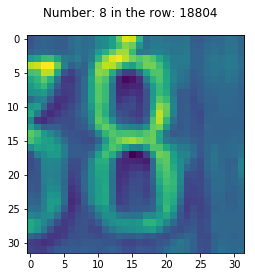

In [10]:
import matplotlib.pyplot as plt
img_num = np.random.randint(0, X_train.shape[0]) #Get a random integer between 0 and number of examples in train dataset
plt.imshow(X_train[img_num]) #Show the image from train dataset
plt.suptitle('Number: ' + str(y_train[img_num])+ ' in the row: '+str(img_num))
plt.show()

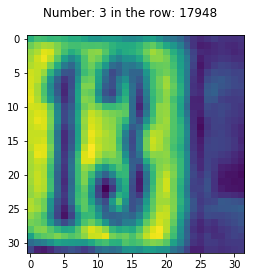

In [11]:
img_num1 = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(X_test[img_num1]) #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num1])+' in the row: '+str(img_num1))
plt.show()

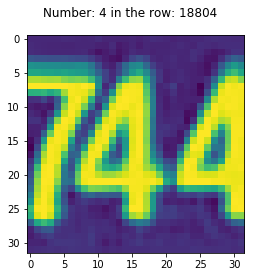

In [12]:
plt.imshow(X_val[img_num]) #Show the image from validation dataset
plt.suptitle('Number: ' + str(y_val[img_num])+ ' in the row: '+str(img_num))
plt.show()

In [13]:
y_train[0:10]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [14]:
import pandas as pd
size = 42000
ytrain_df = pd.DataFrame(np.array(y_train))

In [15]:
ytrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 1 columns):
0    42000 non-null uint8
dtypes: uint8(1)
memory usage: 41.1 KB


In [16]:
ytrain_df.head(10)

,0
0,2
1,6
2,7
3,4
4,4
5,0
6,3
7,0
8,7
9,3


In [17]:
ytrain_df[0].groupby(by = ytrain_df[0]).count()

0
0    4186
1    4172
2    4197
3    4281
4    4188
5    4232
6    4168
7    4192
8    4188
9    4196
Name: 0, dtype: int64

In [10]:
X_train = np.array(X_train) 
X_test = np.array(X_test)
X_val = np.array(X_val)

In [11]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [20]:
#X_train = X_train/255 #normalize #not

In [32]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [22]:
X_train.shape

(42000, 32, 32)

In [ ]:
#USING KNN CLASSIFIER

In [23]:
X_train1 = X_train.reshape(X_train.shape[0], 32*32).astype('float64')
X_test1 = X_test.reshape(X_test.shape[0], 32*32).astype('float64')
X_val1 = X_val.reshape(X_val.shape[0], 32*32).astype('float64')

In [24]:
X_train1.shape

(42000, 1024)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 10)
NNH.fit(X_train1, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [33]:
#validation = NNH.predict(X_test1)

In [32]:
NNH.score(X_val1, y_val)

0.6044166666666667

In [35]:
MSE = []
from sklearn import metrics
neighbours_list = range(9,30,2)
for k in neighbours_list :
    print(k)
    NNH = KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train1, y_train)
    validation1 = NNH.predict(X_val1)
    MSE.append(1 - metrics.accuracy_score(y_val,validation1))

9
11
13
15
17
19
21
23
25
27
29


In [38]:
MSE

[0.3940666666666667,
 0.3968166666666667,
 0.40116666666666667,
 0.4055333333333333,
 0.4075,
 0.40900000000000003,
 0.41231666666666666,
 0.41379999999999995,
 0.4159166666666667,
 0.4178666666666667,
 0.41823333333333335]

In [39]:
neighbours_list = list(neighbours_list)
MSElist = []
min_indices = []
MSElist = MSE
for i in range(len(MSElist)) :
    if MSElist[i] == min(MSE) :
        min_indices.append(i)
print("Optimal k value(s) are:")
for i in range(len(neighbours_list)) :
    for j in min_indices :
        if i == j :
            print(neighbours_list[i])

Optimal k value(s) are:
9


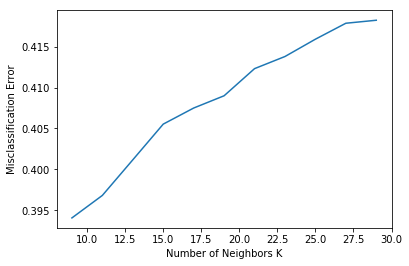

In [40]:
import matplotlib.pyplot as plt
plt.plot(neighbours_list,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [41]:
NNH1 = KNeighborsClassifier(n_neighbors= 9) #optimal k value

In [44]:
NNH1.fit(X_train1, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [45]:
NNH1.score(X_test1, y_test)

0.5124444444444445

In [46]:
test = NNH.predict(X_test1)

In [47]:
test

array([0, 2, 2, ..., 7, 9, 1], dtype=uint8)

In [48]:
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [49]:
from sklearn import metrics
# classification report
print("Classification report for classifier :\n%s" % (metrics.classification_report(y_test, test)))

# confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, test))

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.45      0.70      0.55      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.53      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.64      1812
           5       0.53      0.40      0.46      1768
           6       0.51      0.42      0.46      1832
           7       0.70      0.63      0.66      1808
           8       0.47      0.36      0.41      1812
           9       0.55      0.44      0.49      1804

   micro avg       0.53      0.53      0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000

Confusion matrix:
[[1276   61   31   45   49   32   87   44   64  125]
 [  94 1341   52   79   78   35   35   48   32   34]
 [  87  247  959   95   52   43   33  156   47   84]
 [ 114  269  118  739   5

In [12]:
#USING NEURAL NETWORK

In [13]:
y_train[0]

2

In [14]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model.add(tf.keras.layers.BatchNormalization())

In [16]:
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [18]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
from keras import optimizers

opt = optimizers.SGD(lr=0.01)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

Using TensorFlow backend.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [21]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=32) #with Validation set. used for tuning parameters.

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 164us/sample - loss: 1.8951 - accuracy: 0.3393 - val_loss: 1.2863 - val_accuracy: 0.5913
Epoch 2/100
42000/42000 [==============================] - 6s 147us/sample - loss: 1.2051 - accuracy: 0.6122 - val_loss: 0.9850 - val_accuracy: 0.6960
Epoch 3/100
42000/42000 [==============================] - 6s 147us/sample - loss: 0.9914 - accuracy: 0.6877 - val_loss: 0.8762 - val_accuracy: 0.7335
Epoch 4/100
42000/42000 [==============================] - 6s 148us/sample - loss: 0.8827 - accuracy: 0.7235 - val_loss: 0.7439 - val_accuracy: 0.7726
Epoch 5/100
42000/42000 [==============================] - 6s 151us/sample - loss: 0.8053 - accuracy: 0.7469 - val_loss: 0.7036 - val_accuracy: 0.7830
Epoch 6/100
42000/42000 [==============================] - 6s 149us/sample - loss: 0.7547 - accuracy: 0.7628 - val_loss: 0.6658 - val_accuracy: 0.7963
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 6s 147us/sample - loss: 0.3301 - accuracy: 0.8924 - val_loss: 0.2993 - val_accuracy: 0.9166
Epoch 55/100
42000/42000 [==============================] - 6s 146us/sample - loss: 0.3274 - accuracy: 0.8937 - val_loss: 0.3040 - val_accuracy: 0.9156
Epoch 56/100
42000/42000 [==============================] - 6s 148us/sample - loss: 0.3223 - accuracy: 0.8946 - val_loss: 0.3203 - val_accuracy: 0.9106
Epoch 57/100
42000/42000 [==============================] - 6s 148us/sample - loss: 0.3191 - accuracy: 0.8971 - val_loss: 0.2990 - val_accuracy: 0.9179
Epoch 58/100
42000/42000 [==============================] - 6s 147us/sample - loss: 0.3179 - accuracy: 0.8967 - val_loss: 0.2963 - val_accuracy: 0.9173
Epoch 59/100
42000/42000 [==============================] - 6s 148us/sample - loss: 0.3172 - accuracy: 0.8956 - val_loss: 0.2904 - val_accuracy: 0.9202
Epoch 60/100
42000/42000 [==============================] - 6s 147us/sample - loss: 0.3091 - accuracy

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32) #with Test set.

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 111us/sample - loss: 0.2474 - accuracy: 0.9183 - val_loss: 0.6195 - val_accuracy: 0.8581
Epoch 2/100
42000/42000 [==============================] - 5s 108us/sample - loss: 0.2401 - accuracy: 0.9210 - val_loss: 0.6263 - val_accuracy: 0.8562
Epoch 3/100
42000/42000 [==============================] - 5s 109us/sample - loss: 0.2452 - accuracy: 0.9180 - val_loss: 0.6281 - val_accuracy: 0.8483
Epoch 4/100
42000/42000 [==============================] - 5s 112us/sample - loss: 0.2435 - accuracy: 0.9192 - val_loss: 0.6226 - val_accuracy: 0.8572
Epoch 5/100
42000/42000 [==============================] - 5s 113us/sample - loss: 0.2447 - accuracy: 0.9189 - val_loss: 0.6098 - val_accuracy: 0.8623
Epoch 6/100
42000/42000 [==============================] - 5s 109us/sample - loss: 0.2365 - accuracy: 0.9218 - val_loss: 0.6409 - val_accuracy: 0.8491
Epoch 7/100
42000/42000 [===================

42000/42000 [==============================] - 4s 105us/sample - loss: 0.2077 - accuracy: 0.9307 - val_loss: 0.6713 - val_accuracy: 0.8544
Epoch 55/100
42000/42000 [==============================] - 4s 106us/sample - loss: 0.2011 - accuracy: 0.9324 - val_loss: 0.6616 - val_accuracy: 0.8587
Epoch 56/100
42000/42000 [==============================] - 4s 106us/sample - loss: 0.2050 - accuracy: 0.9313 - val_loss: 0.6892 - val_accuracy: 0.8549
Epoch 57/100
42000/42000 [==============================] - 4s 105us/sample - loss: 0.2019 - accuracy: 0.9332 - val_loss: 0.6913 - val_accuracy: 0.8543
Epoch 58/100
42000/42000 [==============================] - 4s 105us/sample - loss: 0.1979 - accuracy: 0.9337 - val_loss: 0.6897 - val_accuracy: 0.8517
Epoch 59/100
42000/42000 [==============================] - 4s 107us/sample - loss: 0.1972 - accuracy: 0.9335 - val_loss: 0.6798 - val_accuracy: 0.8558
Epoch 60/100
42000/42000 [==============================] - 4s 106us/sample - loss: 0.2005 - accuracy

In [23]:
results = model.evaluate(X_test, y_test, batch_size=128)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
print('test loss, test acc:', results)

test loss, test acc: [0.7041140018039279, 0.8578333]


In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred=np.argmax(y_pred, axis=1) 
y_labels=np.argmax(y_test, axis=1) 

In [27]:
y_pred

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

In [28]:
y_labels

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

In [30]:
from sklearn import metrics
# classification report
print("Classification report for classifier :\n%s" % (metrics.classification_report(y_labels, y_pred)))

# confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_labels, y_pred))

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1814
           1       0.85      0.86      0.86      1828
           2       0.90      0.87      0.88      1803
           3       0.83      0.81      0.82      1719
           4       0.85      0.91      0.88      1812
           5       0.83      0.86      0.85      1768
           6       0.88      0.81      0.84      1832
           7       0.88      0.90      0.89      1808
           8       0.86      0.80      0.83      1812
           9       0.83      0.85      0.84      1804

   micro avg       0.86      0.86      0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000

Confusion matrix:
[[1637   33   11    6   32    7   15   16   18   39]
 [  25 1572   20   34   71   11   12   48   21   14]
 [  17   19 1563   40   34   13    4   60   13   40]
 [  21   36   24 1390   2